<a href="https://colab.research.google.com/github/meng430/repo0/blob/main/EX03_05_%E5%8F%B0%E7%81%A3%E8%82%A1%E7%A5%A8%E5%B8%82%E5%A0%B4%E5%80%8B%E8%82%A1%E6%AF%8F%E6%97%A5%E6%88%90%E4%BA%A4%E8%B3%87%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

--2025-04-22 09:11:06--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.31.139, 142.250.31.101, 142.250.31.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-22 09:11:06--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.122.132, 2607:f8b0:4004:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.122.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-22 09:11:13 

In [21]:
def get_stock_data(date, stock_no):
  url = f'https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html'
  df_mth = pd.read_html(url, header=1)[0]
  return df_mth

用程式邏輯解

In [22]:
date_list = []
years = [2024, 2025]
for i in range(3, 16):
  year = years[i//12]
  mth = i % 12 +1
  date_list.append(f'{year}{mth:02}01')
date_list

['20240401',
 '20240501',
 '20240601',
 '20240701',
 '20240801',
 '20240901',
 '20241001',
 '20241101',
 '20241201',
 '20250101',
 '20250201',
 '20250301',
 '20250401']

用pandas內建功能解

In [23]:
date_range = pd.date_range(start='2024-04-01', end='2025-04-01',freq='MS')
date_list = []
date_list = date_range.strftime('%Y%m%d').tolist()
date_list

['20240401',
 '20240501',
 '20240601',
 '20240701',
 '20240801',
 '20240901',
 '20241001',
 '20241101',
 '20241201',
 '20250101',
 '20250201',
 '20250301',
 '20250401']

In [24]:
df = pd.DataFrame()
for date in date_list:
  df = pd.concat([df, get_stock_data(date, '0050')],ignore_index=True)
  print(df)

           日期      成交股數        成交金額     開盤價     最高價     最低價     收盤價  漲跌價差  \
0   113/04/01   5727780   904051439  158.20  158.75  157.25  157.40 -0.50   
1   113/04/02   7924481  1261718566  158.45  159.65  158.40  159.65  2.25   
2   113/04/03   5042947   799119313  158.65  158.90  157.80  158.55 -1.10   
3   113/04/08   6124837   976164820  158.65  159.85  158.55  159.45  0.90   
4   113/04/09   9043462  1465418271  160.00  163.35  159.90  163.25  3.80   
5   113/04/10   5731265   933773619  162.75  163.30  162.45  163.00 -0.25   
6   113/04/11   4677727   758087448  162.05  162.50  161.65  162.50 -0.50   
7   113/04/12   6129174   994740991  162.60  162.80  161.95  162.10 -0.40   
8   113/04/15   8727145  1397288443  160.25  160.55  159.60  160.00 -2.10   
9   113/04/16  18674686  2914071977  158.30  158.30  154.75  155.65 -4.35   
10  113/04/17   8077871  1267652543  155.95  157.70  155.90  157.40  1.75   
11  113/04/18   6903163  1087753112  156.35  158.95  155.80  158.95  1.55   

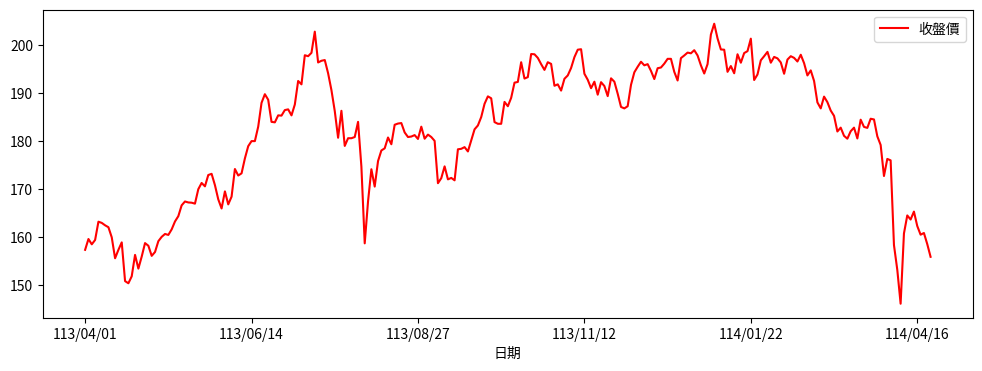

In [25]:
import matplotlib.pyplot as plt

df.plot(kind='line', x='日期', y='收盤價', color='red', figsize=(12, 4))
plt.show()

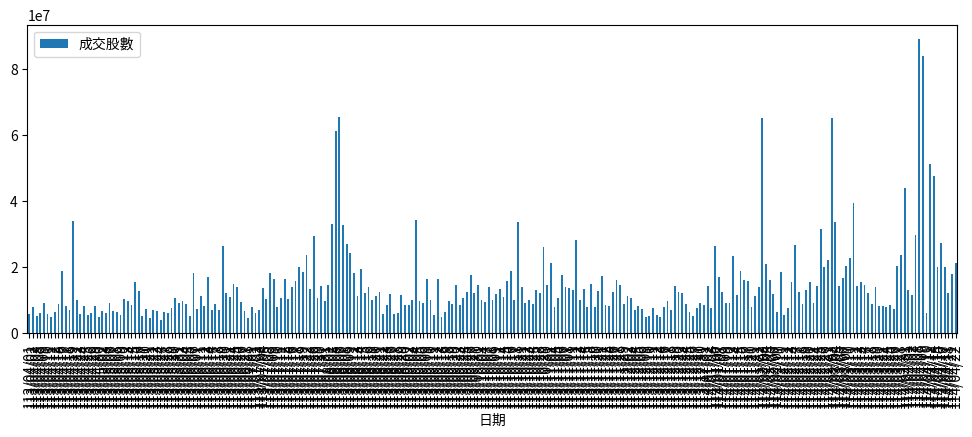

In [26]:
df.plot(kind='bar',x='日期', y='成交股數', figsize=(12, 4))
plt.show()

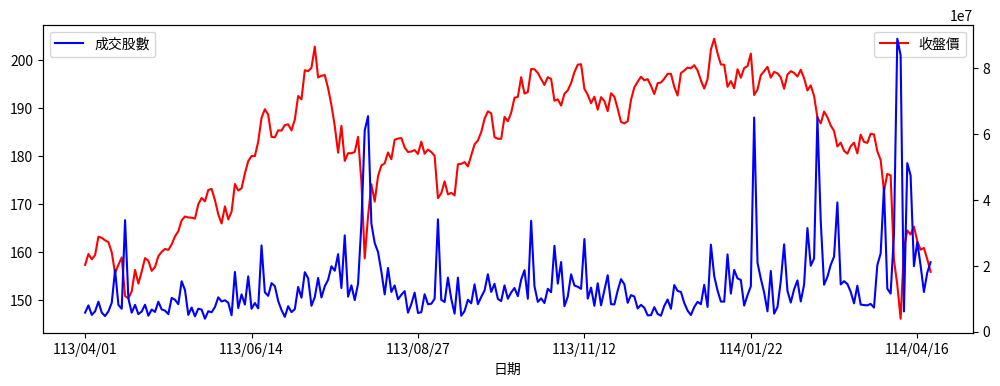

In [27]:
fig, axl = plt.subplots(figsize=(12, 4))
df.plot(kind='line', x='日期', y='收盤價', ax=axl, color='red')

ax2 = axl.twinx()
df.plot(kind='line', x='日期', y='成交股數', ax=ax2, color='blue')

plt.show()

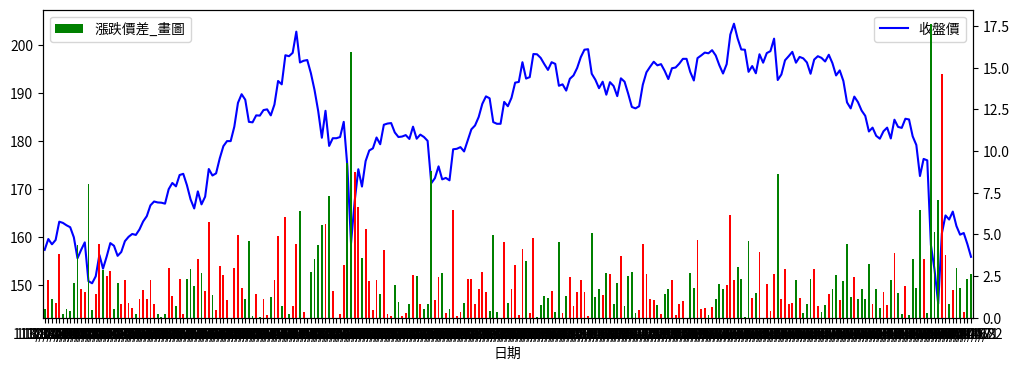

In [29]:
df['漲跌價差'] = pd.to_numeric(df['漲跌價差'],errors='coerce')
df['Color'] = df['漲跌價差'].apply(lambda x: 'green' if x < 0 else 'red')
fig, axl = plt.subplots(figsize=(12, 4))
df['漲跌價差_畫圖'] = df['漲跌價差'].apply(lambda x: -x if x < 0 else x)
df.plot(kind='line', x='日期', y='收盤價', ax=axl, color='blue')
ax2 = axl.twinx()
df.plot(kind='bar', x='日期', y='漲跌價差_畫圖', ax=ax2, color=df['Color'])
plt.show()